#                                                                               TakenMind Internship Project

## Introduction

I am SHIVANGI JOSHI. This Notebook has been developed by me . Originally the Project Framework was PyCharm.

## Problem Statement

The data is for company X which is trying to control attrition. There are two sets of data: "Existing employees" and "Employees who have left". Following attributes are available for every employee:  
Satisfaction Level  
Last evaluation  
Number of projects  
Average monthly hours  
Time spent at the company  
Whether they have had a work accident  
Whether they have had a promotion in the last 5 years  
Departments (column sales)  
Salary  
Whether the employee has left  


### Objective

What type of employees are leaving? Determine which employees are prone to leave next. Present your results with **accuracy scores** and with **various plots**.

## Proof Of Concept

### 1.case study:  
The dataset consist of 14999 observations of 11 attributes which are described below:  
**Emp ID:** The employee ID given by the firm.  
**satisfaction_level:** Relates to environment satisfaction level of the employee. Ranges from 0 to 1.  
**last_evaluation:** Last evauation scores of the employee.  
**number_project:** Number of projects done by the employee.  
**average_montly_hours:** Working hours per month.  
**time_spend_company:** how many companies he had work for.  
**Work_accident:** If any work accident.  
**promotion_last_5years:** Is there any promotion in last five years.  
**Dept:** These are mainly sales, IT, technical, accounting, management, support, R&D, product_msg and marketing.   
**Salary:** ranges from low, medium to high.  
**Attrition:** whether the employee had left the company or not(No or yes).  

### 2.Collecting and Data Analysing:  
The data set was given in two different format:    
**Employees existing** and **Employees left**  
I merge up the two data set with adding an Attrition attribute to the set with the values yes or no.  

I gone through the data to figure out how to build a model that will perfectly work to predict the attrition of employees leaving the firm.  

I am using Logistic Regression for this Problem Statement.  

### 3.Conclusions:  
Employee attrition must be decreased for a firm as it increases the high training cost and the crucial business time of an organisation.  
After going through the deep analysis I figure out some crucial conclusions.  
That are given Below in the Data Analysis part.  

## Code

Importing Libraries and data set.

In [123]:
import pandas as pd
import numpy as np
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# The code was removed by Watson Studio for sharing.

In [47]:
# The code was removed by Watson Studio for sharing.

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Attrition
0,2001,0.58,0.74,4,215,3,0,0,sales,low,No
1,2002,0.82,0.67,2,202,3,0,0,sales,low,No
2,2003,0.45,0.69,5,193,3,0,0,sales,low,No
3,2004,0.78,0.82,5,247,3,0,0,sales,low,No
4,2005,0.49,0.60,3,214,2,0,0,sales,low,No
5,2006,0.36,0.95,3,206,4,0,0,sales,low,No
6,2007,0.54,0.37,2,176,2,0,0,sales,low,No
7,2008,0.99,0.91,5,136,4,0,0,sales,low,No
8,2009,0.50,0.75,6,127,3,0,0,sales,low,No
9,2010,0.74,0.64,4,268,3,0,0,sales,low,No


For using Logistic Regression I must convert category models to category codes.

In [48]:
df['Attrition'] = df['Attrition'].astype('category')
df['dept'] = df['dept'].astype('category')
df['salary'] = df['salary'].astype('category')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
Emp ID                   14999 non-null int64
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
promotion_last_5years    14999 non-null int64
dept                     14999 non-null category
salary                   14999 non-null category
Attrition                14999 non-null category
dtypes: category(3), float64(2), int64(6)
memory usage: 982.0 KB


In [49]:
df['salary'] = df['salary'].cat.codes
df['dept'] = df['dept'].cat.codes
df['Attrition'] = df['Attrition'].cat.codes
df.head(20)


,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Attrition
0,2001,0.58,0.74,4,215,3,0,0,7,1,0
1,2002,0.82,0.67,2,202,3,0,0,7,1,0
2,2003,0.45,0.69,5,193,3,0,0,7,1,0
3,2004,0.78,0.82,5,247,3,0,0,7,1,0
4,2005,0.49,0.60,3,214,2,0,0,7,1,0
5,2006,0.36,0.95,3,206,4,0,0,7,1,0
6,2007,0.54,0.37,2,176,2,0,0,7,1,0
7,2008,0.99,0.91,5,136,4,0,0,7,1,0
8,2009,0.50,0.75,6,127,3,0,0,7,1,0
9,2010,0.74,0.64,4,268,3,0,0,7,1,0


Taking out necessary features and  describing them statistically.

In [51]:
cdf = df[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','dept','salary','Attrition']]
cdf.head(9)
cdf.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Attrition
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,5.870525,1.347290,0.238083
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,2.868786,0.625819,0.425924
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,4.000000,1.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,7.000000,1.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,8.000000,2.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,9.000000,2.000000,1.000000


## Analysis of Features

As already seen **satisfaction_level,last_evaluation,average_monthly_hours** are continous discrete values, and rest are integer or categorical values.  
Therefore, I will analyse them using **Voilin plots** and rest with **Pie charts**.  

### Pie charts:  
#### 1.Salary

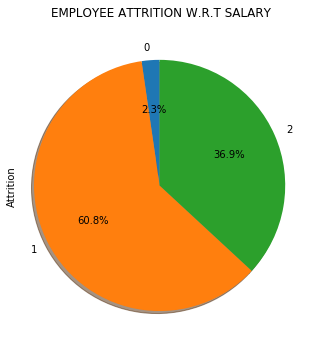

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,Attrition
salary,,,,,,,,,
0,35.63,52.81,283,15834,302,0,0,504.0,82.0
1,958.01,1556.78,8330,448646,8413,95,14,13411.0,2171.0
2,577.57,954.26,5153,276057,5125,74,5,7630.0,1317.0


In [63]:
df_bar=cdf[11429:]
df_bar.shape
df_salary = df_bar.groupby('salary', axis=0).sum()
#df_salary.head()
df_salary['Attrition'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', 
                            startangle=90,     
                            shadow=True,            
                            )

plt.title('EMPLOYEE ATTRITION W.R.T SALARY')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()
df_salary.head()

#### categories:  
0:low  
1:medium  
2:high  
It can be seen that Employees with **medium salaries** are prone to leave next. While low and high salaried Employees are less in comparison.  

#### 2.Time spend in Company:  

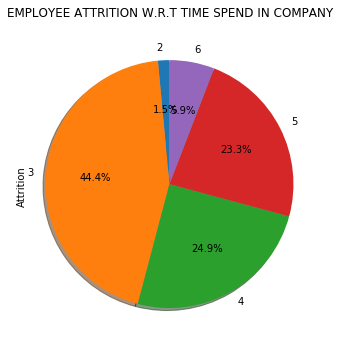

,satisfaction_level,last_evaluation,number_project,average_montly_hours,Work_accident,promotion_last_5years,dept,salary,Attrition
time_spend_company,,,,,,,,,
2,27.65,39.92,215,11171,1,0,340.0,84.0,53.0
3,652.64,824.22,3325,233583,74,15,9452.0,2093.0,1585.0
4,130.77,760.06,5305,239955,45,3,5347.0,1207.0,890.0
5,594.79,750.56,3965,205199,39,1,5039.0,1138.0,833.0
6,165.36,189.09,956,50629,10,0,1367.0,283.0,209.0


In [62]:
df_time = df_bar.groupby('time_spend_company', axis=0).sum()
df_time['Attrition'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', 
                            startangle=90,     
                            shadow=True,            
                            )

plt.title('EMPLOYEE ATTRITION W.R.T TIME SPEND IN COMPANY')
plt.axis('equal')

plt.show()
df_time.head()

#### categories:  
2,3,4,5 and 6 years  
It can be seen that Employees with **medieval durations i.e.3,4 and 5 years** are prone to leave next. While low and high durations Employees i.e 2 and 6 years are less in comparison.

#### 3.Promotion in last 5 years:  

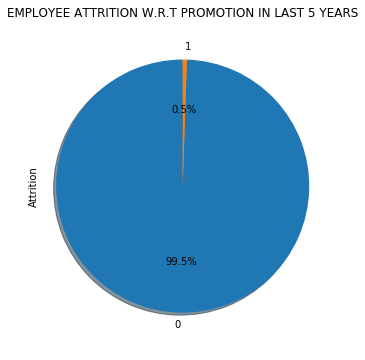

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,dept,salary,Attrition
promotion_last_5years,,,,,,,,,
0,1562.47,2552.67,13708,737160,13778,165,21433.0,4781.0,3551.0
1,8.74,11.18,58,3377,62,4,112.0,24.0,19.0


In [61]:
df_prom = df_bar.groupby('promotion_last_5years', axis=0).sum()
df_prom['Attrition'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', 
                            startangle=90,     
                            shadow=True,            
                            )

plt.title('EMPLOYEE ATTRITION W.R.T PROMOTION IN LAST 5 YEARS')
plt.axis('equal')

plt.show()
df_prom.head()

99.5% Employees who had left the firm were given late promotions.

#### 4.Work Accident:  

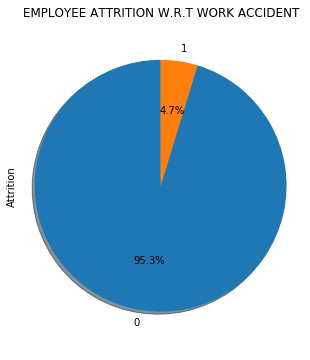

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,promotion_last_5years,dept,salary,Attrition
Work_accident,,,,,,,,,
0,1495.66,2442.77,13126,705903,13181,15,20505.0,4562.0,3401.0
1,75.55,121.08,640,34634,659,4,1040.0,243.0,169.0


In [60]:
df_workacc = df_bar.groupby('Work_accident', axis=0).sum()
df_workacc['Attrition'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', 
                            startangle=90,     
                            shadow=True,            
                            )

plt.title('EMPLOYEE ATTRITION W.R.T WORK ACCIDENT')
plt.axis('equal')

plt.show()
df_workacc.head()

The more the no. of work acccidents the more the Employees had left.

#### 5.Given No. of Projects:  

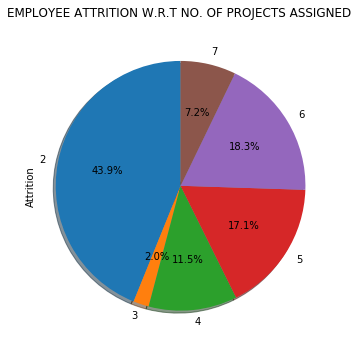

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Attrition
number_project,,,,,,,,,
2,646.71,812.07,229111,4741,73,12,9360.0,2075.0,1566.0
3,41.75,54.23,15767,285,1,0,480.0,101.0,72.0
4,307.85,361.21,98995,2004,27,4,2472.0,565.0,409.0
5,460.43,552.07,149051,3080,29,0,3737.0,823.0,612.0
6,84.08,564.21,176937,2677,35,3,3992.0,879.0,655.0
7,30.39,220.06,70676,1053,4,0,1504.0,362.0,256.0


In [66]:
df_proj = df_bar.groupby('number_project', axis=0).sum()
df_proj['Attrition'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', 
                            startangle=90,     
                            shadow=True,            
                            )

plt.title('EMPLOYEE ATTRITION W.R.T NO. OF PROJECTS ASSIGNED')
plt.axis('equal')

plt.show()
df_proj.head(6)

Most of the Employees who had left the firm were given less no. of projects.

#### 6.Department:  

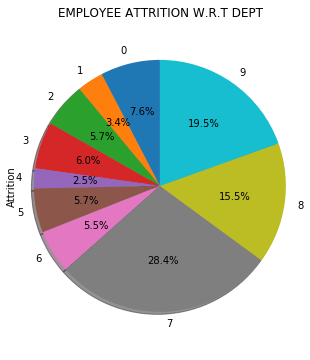

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,Attrition
dept,,,,,,,,,
0,112.44,199.30,1099,58381,1054,9,3,366.0,273.0
1,52.37,90.19,487,25528,484,10,0,179.0,121.0
2,82.13,141.68,790,42234,774,9,0,299.0,204.0
3,93.18,146.14,761,42421,807,7,0,326.0,215.0
4,38.48,66.18,377,18861,342,5,3,121.0,91.0
5,91.99,140.48,727,40801,783,10,0,262.0,203.0
6,95.35,143.86,762,41142,790,9,0,279.0,198.0
7,453.55,720.67,3787,207755,3863,46,7,1302.0,1013.0
8,250.25,403.66,2145,114128,2183,31,3,705.0,555.0


In [67]:
df_dept = df_bar.groupby('dept', axis=0).sum()
df_dept['Attrition'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', 
                            startangle=90,     
                            shadow=True,            
                            )

plt.title('EMPLOYEE ATTRITION W.R.T DEPT')
plt.axis('equal')

plt.show()
df_dept.head(10)

Most of the Employees in the sales and technical department are more prone to leave the firm.

### Voilin Plots

Importing seaborn for Voilin plots and comparison is shown with two case where Attrition is **YES** and other is **NO**.

#### 1.Satisfaction level:  

Attrition is **YES**

,satisfaction_level
11429,0.80
11430,0.11
11431,0.72
11432,0.37
11433,0.41


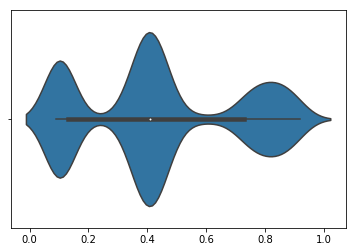

In [108]:
#for who left
import seaborn as sns
df_vol1=df_bar[['satisfaction_level']]
sns.violinplot(df_vol1).get_figure().savefig('violin1.png')
df_vol1.head()

Medium satisfaction level i.e. within 0.26-0.6 Employees are more prone to leave.

Attrition is **NO**

,satisfaction_level
0,0.58
1,0.82
2,0.45
3,0.78
4,0.49


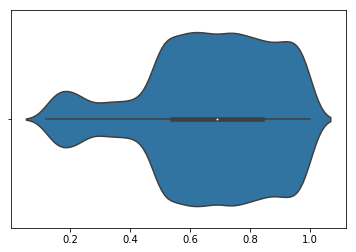

In [105]:
#for who do not left
df_barc=cdf[:11428]
df_vol2=df_barc[['satisfaction_level']]
sns.violinplot(df_vol2).get_figure().savefig('violin2.png')
df_vol2.head()

As it can be clearly seen more no. of present employees have higher satisfaction level.

#### 2.Last Evaluation:

Attrition is **yes**

,last_evaluation
11429,0.86
11430,0.88
11431,0.87
11432,0.52
11433,0.50


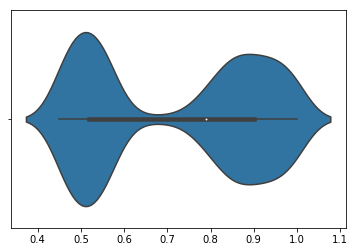

In [109]:
df_vol12=df_bar[['last_evaluation']]
sns.violinplot(df_vol12).get_figure().savefig('violin3.png')
df_vol12.head()

These Employees had lesser last evaluation score, comparitively. More no. of Employees are in lesser score region.

Attriton is **YES**

,last_evaluation
0,0.74
1,0.67
2,0.69
3,0.82
4,0.60


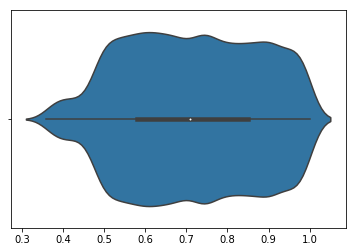

In [110]:
df_vol22=df_barc[['last_evaluation']]
sns.violinplot(df_vol22).get_figure().savefig('violin4.png')
df_vol22.head()

Employees with last evaluation scores higher are still working for the firm.

#### 3.Average monthly hours:

Attrition is **YES**

,average_montly_hours
11429,262
11430,272
11431,223
11432,159
11433,153


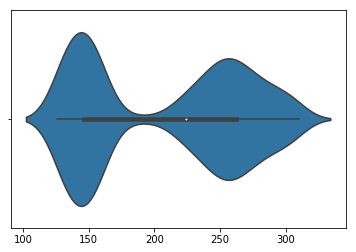

In [111]:
df_vol13=df_bar[['average_montly_hours']]
sns.violinplot(df_vol13).get_figure().savefig('violin5.png')
df_vol13.head()

Employees are spending compartively less time per month.

Attrition is **NO**

,average_montly_hours
0,215
1,202
2,193
3,247
4,214


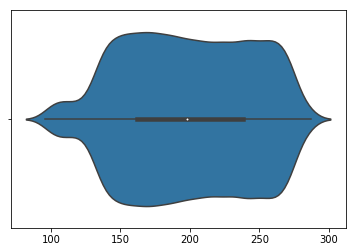

In [112]:
df_vol23=df_barc[['average_montly_hours']]
sns.violinplot(df_vol23).get_figure().savefig('violin6.png')
df_vol23.head()

Employees spending more time per month are still working in the firm.

## Building the Model

Shuffling the data.

In [113]:
df = cdf.sample(frac=1).reset_index(drop=True)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Attrition
0,0.82,0.68,3,160,4,0,0,7,2,0
1,0.70,0.93,2,310,3,0,0,6,1,1
2,0.65,0.90,6,217,4,1,1,1,2,0
3,0.48,0.89,4,145,3,0,0,7,1,0
4,0.94,0.84,5,203,3,0,0,9,1,0


In [114]:
df.shape

(14999, 10)

Separating **features** and **target**.

In [115]:
X=df.values[:,0:9]
y=df.values[:,9]


Normalising the Data for the Model. Importing **sci-kit learn**.

In [116]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:9]

array([[ 0.83325762, -0.21091974, -0.65153764, -0.82196952,  0.34365527,
        -0.41116529, -0.14741182,  0.39372503,  1.04300352],
       [ 0.3505979 ,  1.24967285, -1.46286291,  2.18154854, -0.34123516,
        -0.41116529, -0.14741182,  0.04513394, -0.55495458],
       [ 0.14948968,  1.07440174,  1.7824382 ,  0.31936734,  0.34365527,
         2.4321119 ,  6.78371644, -1.69782153,  1.04300352],
       [-0.53427826,  1.01597804,  0.15978764, -1.12232132, -0.34123516,
        -0.41116529, -0.14741182,  0.39372503, -0.55495458],
       [ 1.31591734,  0.72385952,  0.97111292,  0.03903899, -0.34123516,
        -0.41116529, -0.14741182,  1.09090722, -0.55495458],
       [ 0.22993297,  1.30809656,  0.15978764, -1.20241514, -1.0261256 ,
         2.4321119 , -0.14741182,  0.74231612, -0.55495458],
       [ 0.83325762,  0.19804619,  0.15978764,  0.45953152, -0.34123516,
        -0.41116529, -0.14741182,  0.39372503, -0.55495458],
       [-1.25826784, -0.09407233,  0.97111292,  1.58084493,  0

Splitting the train and test data by a ratio of **0.15**.

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.15, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (12749, 9) (12749,)
Test set: (2250, 9) (2250,)


Building the **Logistic Rgression Model**

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

Predicting the Attrition values for test data.

In [119]:
yhat = LR.predict(X_test)
yhat

array([0., 0., 0., ..., 0., 0., 0.])

In [120]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.71089861, 0.28910139],
       [0.63954708, 0.36045292],
       [0.73856169, 0.26143831],
       ...,
       [0.76924618, 0.23075382],
       [0.77882865, 0.22117135],
       [0.50499252, 0.49500748]])

Creating a **Confusion Matrix**.

In [121]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 127  404]
 [ 130 1589]]


Confusion matrix, without normalization
[[ 127  404]
 [ 130 1589]]


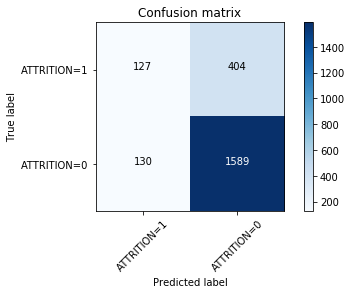

In [122]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['ATTRITION=1','ATTRITION=0'],normalize= False,  title='Confusion matrix')

As it can be seen the Model predicted **1589** values correct for Attrition=0 and **127** for Attrition=1 which are leading to confusion i.e. whose probability values are very close to each other. 

Printing the classification Report.

In [22]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

         0.0       0.79      0.94      0.86      1693
         1.0       0.57      0.26      0.35       557

   micro avg       0.77      0.77      0.77      2250
   macro avg       0.68      0.60      0.61      2250
weighted avg       0.74      0.77      0.73      2250



As it can be seen that F1-score of the model is 0.73 i.e. the accuracy of the model is **73%**.

In [23]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.4391685563970949

Another metric Log-loss suggest the error values predicted which is **44%**.  
This means i am getting 44% uncertainity in my model...

In [24]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.768

Another metric jaccard index suggest the accuracy is **76.8%**.  


#### So, the average accuracy of my Model is 75%, which is not so bad :)

## This Notebook belongs to SJ. It is protected using MIT lic.  
# Thank You :)

SJSJSJSJSJSJSJSJSJSJSJSJSJSJSJSJSJSJSJSJSJSJSJSJSJSJSJSJSJSJSJSJSJSJSJSJSJSJSJSJSJSJSJSJSJSJSJSJSJSJSJSJSJSJSJSJSJSJ